In [26]:
#import pandas
import pandas as pd
import numpy as np

In [34]:
def getdata():
    col_names = ["X1","X2","X3","Label"]
    return pd.DataFrame(pd.read_csv("prepared_dataset.csv"))

In [35]:
DATA = getdata()

In [36]:
feature_cols = ["X1","X2","X3"]
X = DATA[feature_cols] # Features
y = DATA.Label # Target variable

In [57]:
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.9,random_state=0)
X_train,X_test,y_train,y_test=X,X,y,y


,X1,X2,X3
223,5.922546,5.991250,5.842273
237,6.071714,5.692043,5.614691
272,17.453507,17.264786,20.719799
27,9.999782,9.999782,9.999782
266,22.092021,22.586653,21.885110
263,19.163466,23.017710,22.841484
37,9.999782,9.999782,9.999782
108,29.557196,29.557196,29.557196
210,8.630965,8.426062,8.232958
233,6.026430,6.218996,6.355610


In [58]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [59]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[303,   0],
       [  0,   2]], dtype=int64)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

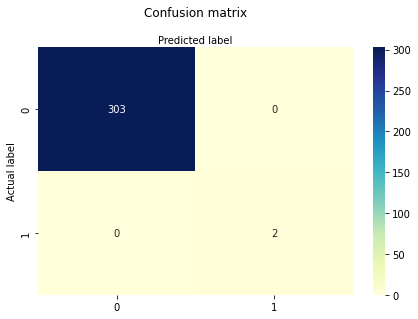

In [61]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
filename = 'finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))



In [67]:
import pickle


X_test = X
y_test = y

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[303,   0],
       [  0,   2]], dtype=int64)